In [1]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading CSV into a DataFrame
file_path = "data/zomato_df_final_data.csv"  
df = pd.read_csv(file_path)

# inspecting first few observation
df.head()

# Looking to basic information 
df.info()

# Checking for missing values
df.isnull().sum()

# Performing Descriptive statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

,cost,lat,lng,rating_number,votes,cost_2
count,10154.000000,10308.000000,10308.000000,7184.000000,7184.000000,10154.000000
mean,51.153240,-32.921377,148.067359,3.283672,83.581013,5.332974
std,27.799485,8.263449,26.695402,0.454580,175.117966,2.147115
min,8.000000,-37.858473,-123.270371,1.800000,4.000000,2.000000
25%,30.000000,-33.899094,151.061061,3.000000,12.000000,3.699187
50%,45.000000,-33.872741,151.172468,3.300000,32.000000,4.857724
75%,60.000000,-33.813451,151.208940,3.600000,87.000000,6.016260
max,500.000000,51.500986,152.869052,4.900000,3236.000000,40.000000


## Using Horizontal BoxPlot understanding different unique cuisines that are served by Sydney restaurants

C:\Users\AR Gadget\AppData\Local\Temp\ipykernel_22952\1679676727.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=unique_cuisines.index, x=unique_cuisines.values, palette="viridis")


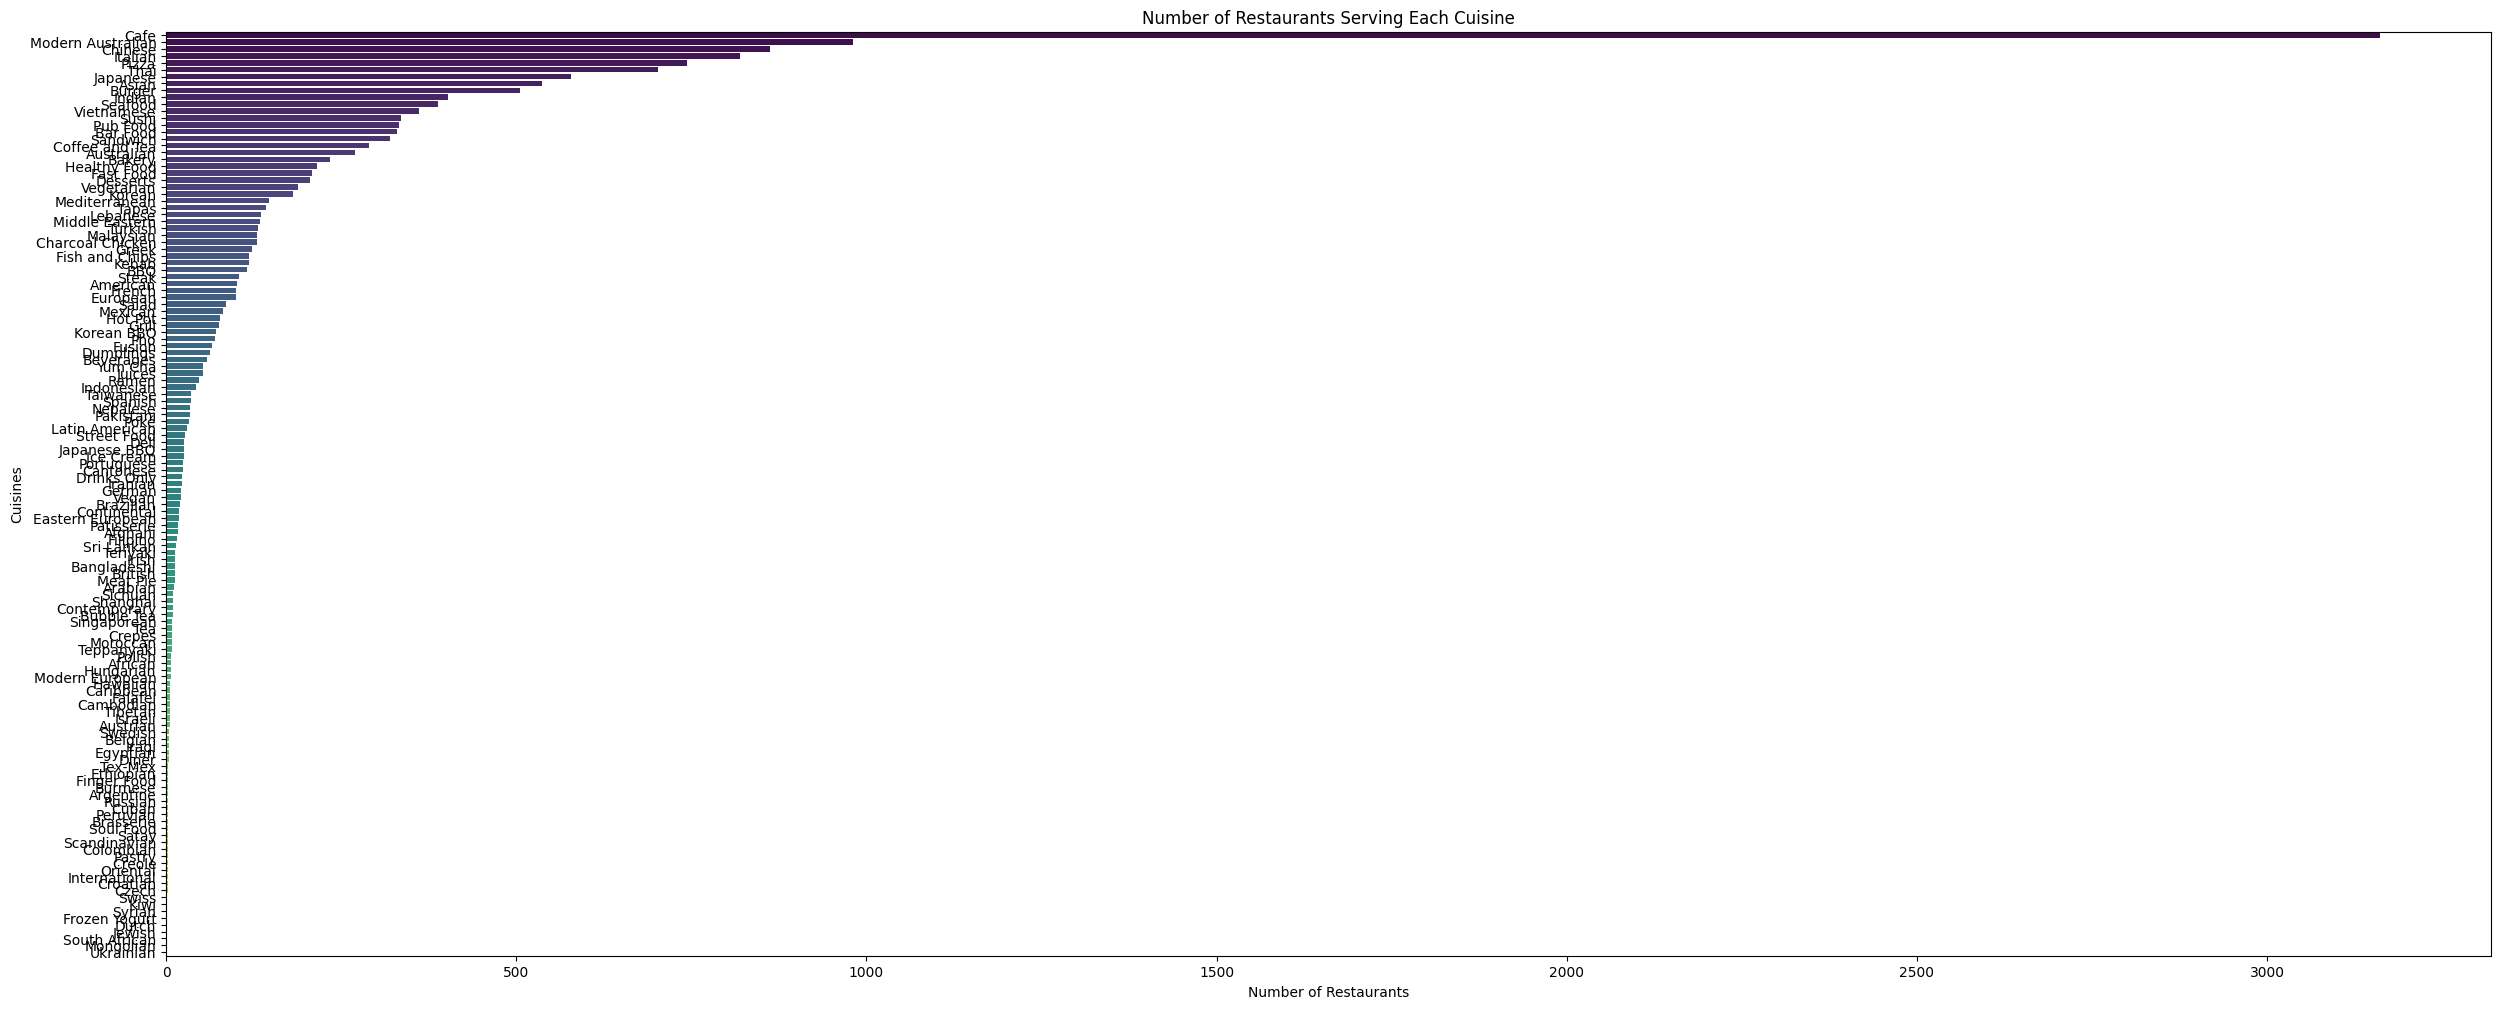

Total number of unique cuisines: 134
Unique cuisine types:
{'Swiss', 'Caribbean', 'Russian', 'Thai', 'Ice Cream', 'Teppanyaki', 'African', 'BBQ', 'Finger Food', 'Bangladeshi', 'Tex-Mex', 'Indonesian', 'Bar Food', 'Nepalese', 'Mediterranean', 'Cafe', 'American', 'European', 'Taiwanese', 'Afghani', 'Shanghai', 'Beverages', 'Street Food', 'Sushi', 'Yum Cha', 'British', 'Brazilian', 'South African', 'Turkish', 'Tapas', 'Desserts', 'Vegan', 'Jewish', 'Iranian', 'Creole', 'Portuguese', 'Cantonese', 'Bakery', 'Irish', 'Israeli', 'Diner', 'Swedish', 'Mongolian', 'Juices', 'Burger', 'Latin American', 'Pho', 'Oriental', 'Burmese', 'Croatian', 'Pizza', 'Teriyaki', 'Japanese', 'Czech', 'Salad', 'Pastry', 'Asian', 'Syrian', 'Ramen', 'Singaporean', 'Filipino', 'Sandwich', 'Mexican', 'Sri Lankan', 'Steak', 'Kiwi', 'Healthy Food', 'Grill', 'Seafood', 'Kebab', 'Fusion', 'Brasserie', 'Tea', 'Argentine', 'Dumplings', 'Peruvian', 'Scandinavian', 'Colombian', 'Austrian', 'Cuban', 'Malaysian', 'Hawaiian', '

In [2]:
# Sorting the strings, spliting them & converting the types to lists
df['cuisine'] = df['cuisine'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# listing out all the cuisines
all_cuisines = [cuisine for sublist in df['cuisine'] for cuisine in sublist]

# Counting out the cuisines
unique_cuisines = pd.Series(all_cuisines).value_counts()

# Plotting the number of unique cuisines (BarPlot)
plt.figure(figsize=(30,12))
sns.barplot(y=unique_cuisines.index, x=unique_cuisines.values, palette="viridis")
plt.title("Number of Restaurants Serving Each Cuisine")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisines")
plt.show()


# Getting the unique cuisine types
unique_cuisines = set(all_cuisines)

# Finding the num of unique cuisines
print(f"Total number of unique cuisines: {len(unique_cuisines)}")

# Names of the unique cuisines
print("Unique cuisine types:")
print(unique_cuisines)


# Counting suburbs (top 3) with the highest number of restaurants

C:\Users\AR Gadget\AppData\Local\Temp\ipykernel_22952\2597957627.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_suburbs.index, y=top_3_suburbs.values, palette="Blues_d")


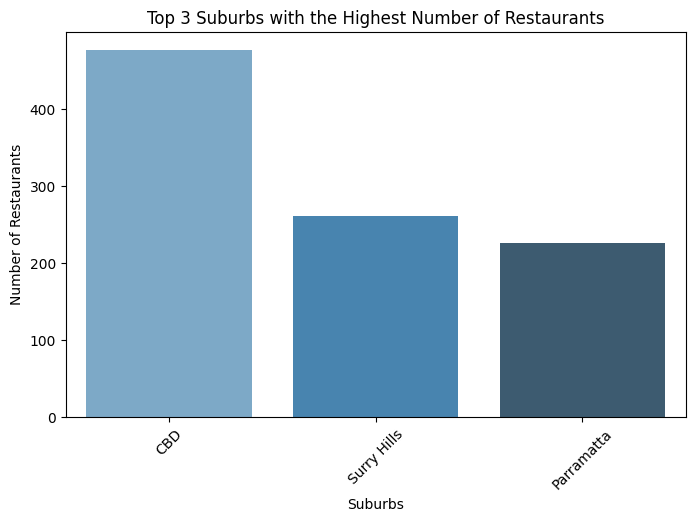

subzone
CBD            476
Surry Hills    260
Parramatta     225
Name: count, dtype: int64


In [3]:
# Grouping of 'subzone' (suburb) & counting the number of restaurants for each suburbs
suburb_counts = df['subzone'].value_counts()

# Getting top 3 with most restaurants
top_3_suburbs = suburb_counts.head(3)

# BoxPlot  of the top 3 suburbs 
plt.figure(figsize=(8,5))
sns.barplot(x=top_3_suburbs.index, y=top_3_suburbs.values, palette="Blues_d")
plt.title("Top 3 Suburbs with the Highest Number of Restaurants")
plt.xlabel("Suburbs")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)  
plt.show()

# Looking into the top 3 suburbs
print(top_3_suburbs)


# "Restaurants with ‘excellent’ ratings are mostly costly while those with ‘Poor’ ratings are rarely expensive." is partially correct per rating number

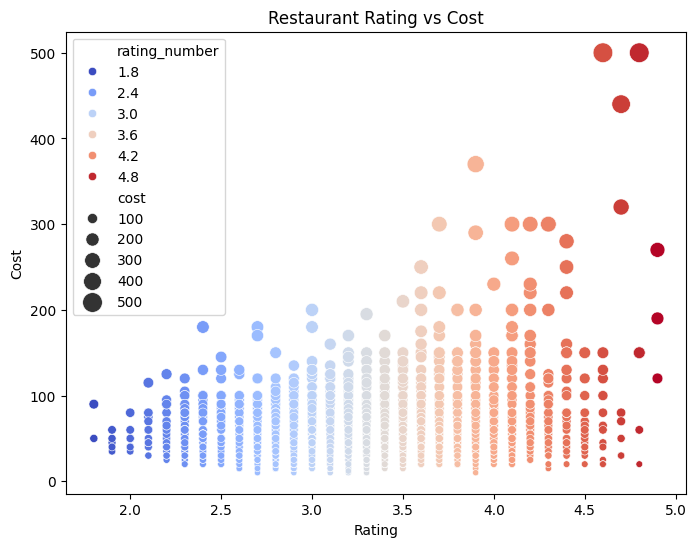

Correlation between rating and cost: 0.23
Weak positive relation


C:\Users\AR Gadget\AppData\Local\Temp\ipykernel_22952\4284261386.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['rating_category'] = pd.cut(df_clean['rating_number'], bins=[0, 3.75, 5], labels=["Low", "High"])
C:\Users\AR Gadget\AppData\Local\Temp\ipykernel_22952\4284261386.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_cost_by_rating = df_clean.groupby('rating_category')['cost'].mean()
C:\Users\AR Gadget\AppData\Local\Temp\ipykernel_22952\4284261386.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and 

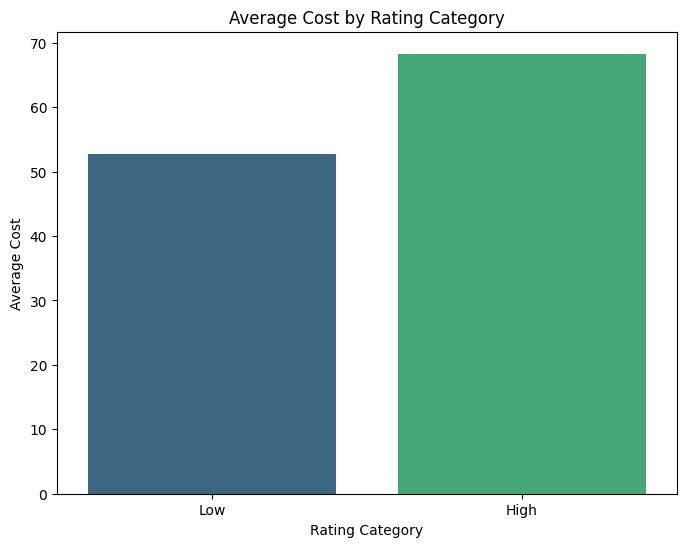

rating_category
Low     52.818762
High    68.311943
Name: cost, dtype: float64
While the highly rated restaurants are expensive, the lower rated restaurants by no way cheap. 
Weak positive relation indicates that some higly rated restaurants can be affordable as well and poorly rated restaurants can be expensive.


In [4]:
# Removal of rows with NA or missing values
df_clean = df.dropna(subset=['rating_number', 'cost'])

# Scatter plot visualisation of relationship between rating_number and cost
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rating_number', y='cost', data=df_clean, hue='rating_number', palette="coolwarm", size='cost', sizes=(20, 200))
plt.title("Restaurant Rating vs Cost")
plt.xlabel("Rating")
plt.ylabel("Cost")
plt.show()

# Calculating the correlation between rating_number and cost
correlation = df_clean['rating_number'].corr(df_clean['cost'])
print(f"Correlation between rating and cost: {correlation:.2f}")

# Evaluating the level of correlation
def evaluate_correlation(correlation):
    if 0 <= correlation <= 0.3:
        return "Weak positive relation"
    elif 0.31 <= correlation <= 0.59:
        return "Moderate positive relation"
    else:
        0.6 <= correlation <= 1
        return "Strong positive relation"

# Printing the level of correlation
result = evaluate_correlation(correlation)
print(result)

# Rating Categorization (Lower end: 0-3.75, Higher end:3.75-5)
df_clean['rating_category'] = pd.cut(df_clean['rating_number'], bins=[0, 3.75, 5], labels=["Low", "High"])

# Calculating the average cost for each rating category
avg_cost_by_rating = df_clean.groupby('rating_category')['cost'].mean()

# Bar plot that visualises average cost by rating category
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_cost_by_rating.index, y=avg_cost_by_rating.values, palette="viridis")
plt.title("Average Cost by Rating Category")
plt.xlabel("Rating Category")
plt.ylabel("Average Cost")
plt.show()

# Looking into the avg cost/ratings
print(avg_cost_by_rating)

# Result from the numbers and visuals
print("While the highly rated restaurants are expensive, the lower rated restaurants by no way cheap. \nWeak positive relation indicates that some higly rated restaurants can be affordable as well and poorly rated restaurants can be expensive.")

# "Restaurants with ‘excellent’ ratings are mostly costly while those with ‘Poor’ ratings are rarely expensive" is partially correct.

C:\Users\AR Gadget\AppData\Local\Temp\ipykernel_22952\2952202485.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Rating Text')


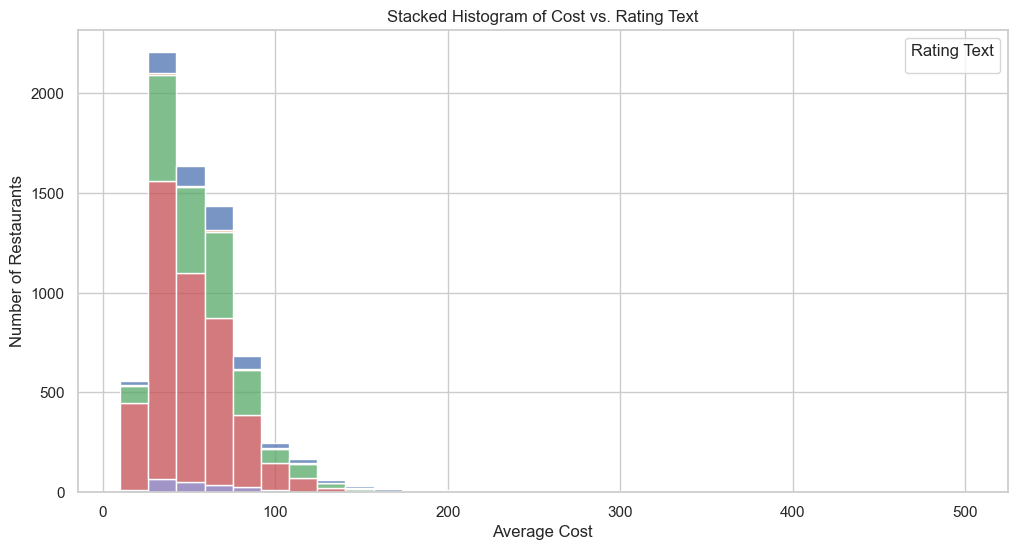

C:\Users\AR Gadget\AppData\Local\Temp\ipykernel_22952\2952202485.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_cost_by_rating, x='rating_text', y='cost', palette='viridis')


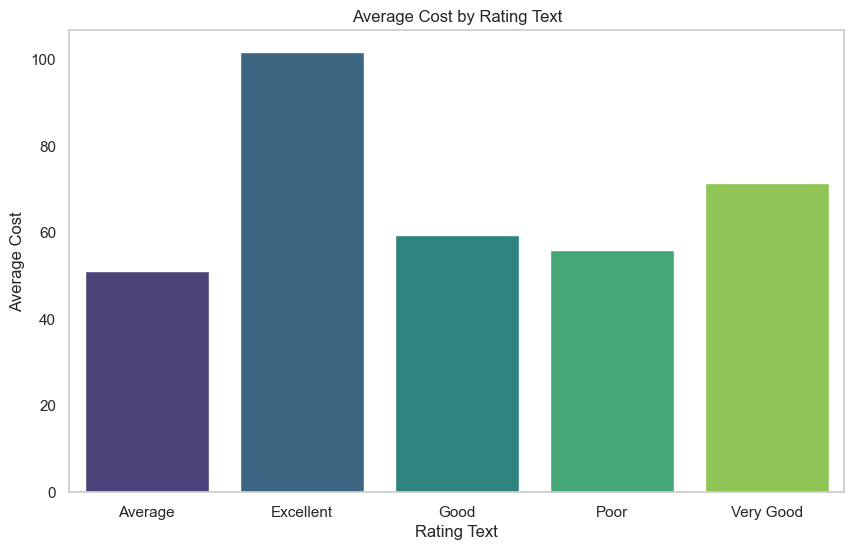

While Excellent rated restaurants are expensive, the lower rated or Poor rated restaurants are not cheap


In [5]:
# Setting visual style
sns.set(style="whitegrid")

# Plotting a stacked bar chart, showing relation between 'cost' and 'rating_text'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='cost', hue='rating_text', multiple='stack', bins=30)
plt.title('Stacked Histogram of Cost vs. Rating Text')
plt.xlabel('Average Cost')
plt.ylabel('Number of Restaurants')
plt.legend(title='Rating Text')
plt.grid(True)
plt.show()

# Calculating average cost for each rating_text category
average_cost_by_rating = df.groupby('rating_text')['cost'].mean().reset_index()

# Sorting values for visualization
average_cost_by_rating = average_cost_by_rating.sort_values('rating_text')

# Plotting the average cost by rating_text
plt.figure(figsize=(10, 6))
sns.barplot(data=average_cost_by_rating, x='rating_text', y='cost', palette='viridis')
plt.title('Average Cost by Rating Text')
plt.xlabel('Rating Text')
plt.ylabel('Average Cost')
plt.grid(axis='y')
plt.show()

# Showing Result
print("While Excellent rated restaurants are expensive, the lower rated or Poor rated restaurants are not cheap")


# Exploratory Analysis of Variables (Cost, Ratings and Type) using histogram, barplot and descriptive statistics

Descriptive Statistics for 'Cost':
count    10154.000000
mean        51.153240
std         27.799485
min          8.000000
25%         30.000000
50%         45.000000
75%         60.000000
max        500.000000
Name: cost, dtype: float64

Descriptive Statistics for 'Rating Number':
count    7184.000000
mean        3.283672
std         0.454580
min         1.800000
25%         3.000000
50%         3.300000
75%         3.600000
max         4.900000
Name: rating_number, dtype: float64


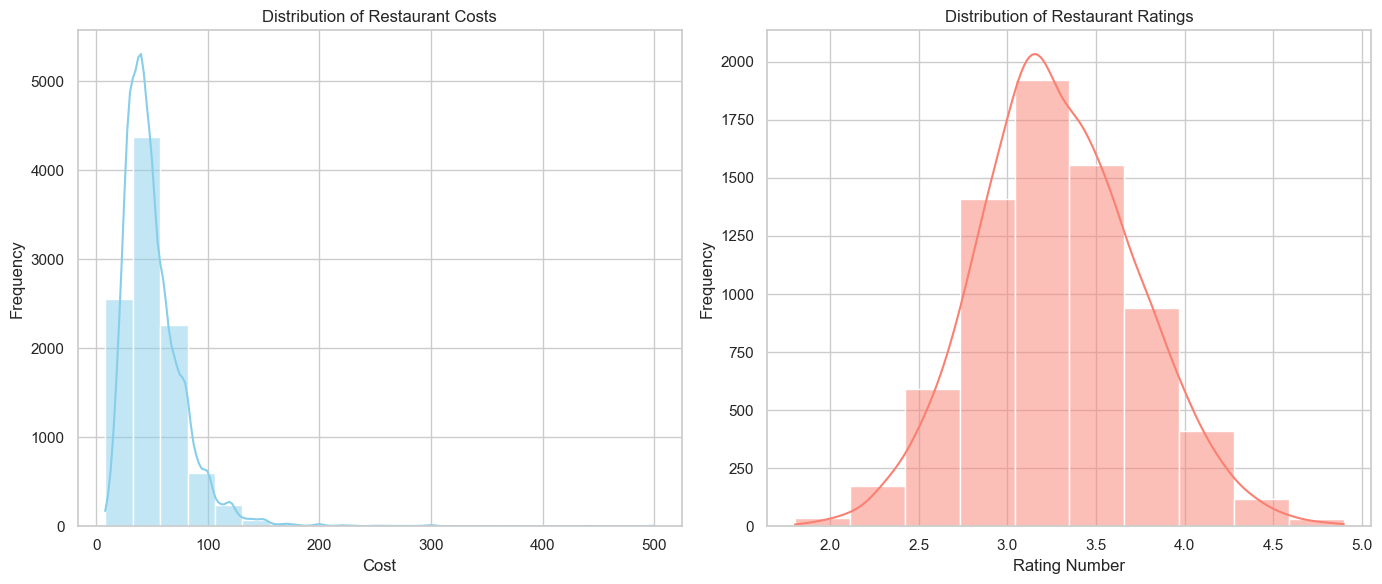

C:\Users\AR Gadget\AppData\Local\Temp\ipykernel_22952\107412501.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette="Spectral")


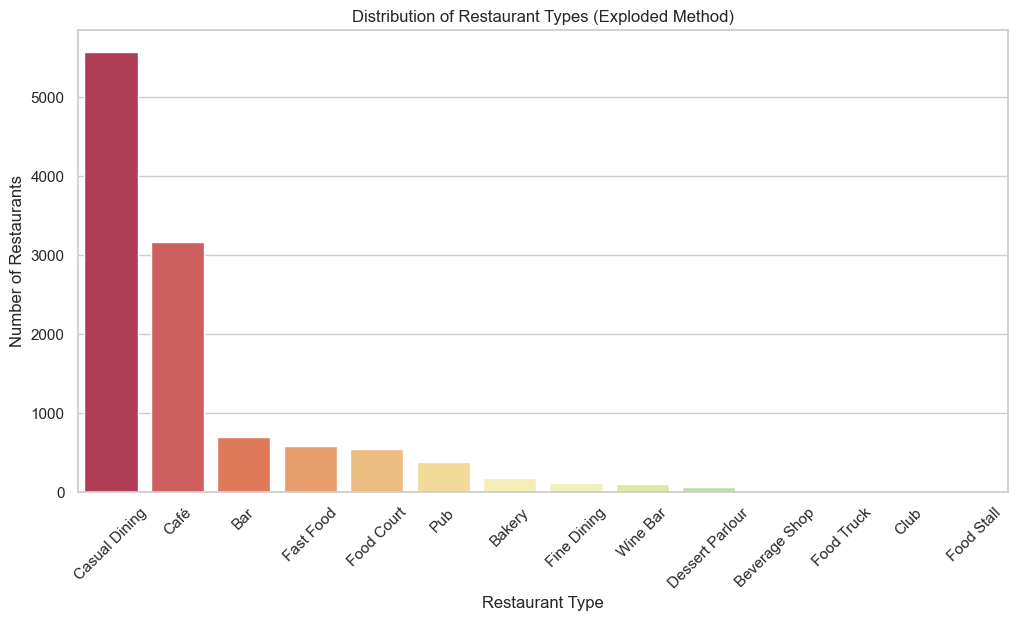

type
Casual Dining      5566
Café               3169
Bar                 692
Fast Food           588
Food Court          543
Pub                 382
Bakery              174
Fine Dining         113
Wine Bar            106
Dessert Parlour      67
Beverage Shop        17
Food Truck           16
Club                 12
Food Stall            2
Name: count, dtype: int64


In [6]:
# Descriptive Statistics for 'cost' and 'rating_number'
cost_stats = df['cost'].describe()
rating_stats = df['rating_number'].describe()

print("Descriptive Statistics for 'Cost':")
print(cost_stats)
print("\nDescriptive Statistics for 'Rating Number':")
print(rating_stats)

# Histograms for Cost and Rating Number
plt.figure(figsize=(14,6))

# Histogram for Cost
plt.subplot(1, 2, 1)
sns.histplot(df['cost'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Restaurant Costs')
plt.xlabel('Cost')
plt.ylabel('Frequency')

# Histogram for Rating Numbers
plt.subplot(1, 2, 2)
sns.histplot(df['rating_number'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating Number')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Converting the type(strings) to lists
df['type'] = df['type'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# New row for type and counting total restaurants for respective category
df_exploded = df.explode('type')
type_counts = df_exploded['type'].value_counts()

# Plotting the types distribution (BarPlot)
plt.figure(figsize=(12,6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette="Spectral")
plt.title('Distribution of Restaurant Types (Exploded Method)')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

# Showing the total number of restaurants for each category
print(type_counts)



# Cuisine Destiny Map: Seafood

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SSC_CODE    494 non-null    object  
 1   SSC_NAME    494 non-null    object  
 2   CONF_VALUE  494 non-null    object  
 3   SQKM        476 non-null    float64 
 4   geometry    471 non-null    geometry
dtypes: float64(1), geometry(1), object(3)
memory usage: 19.4+ KB


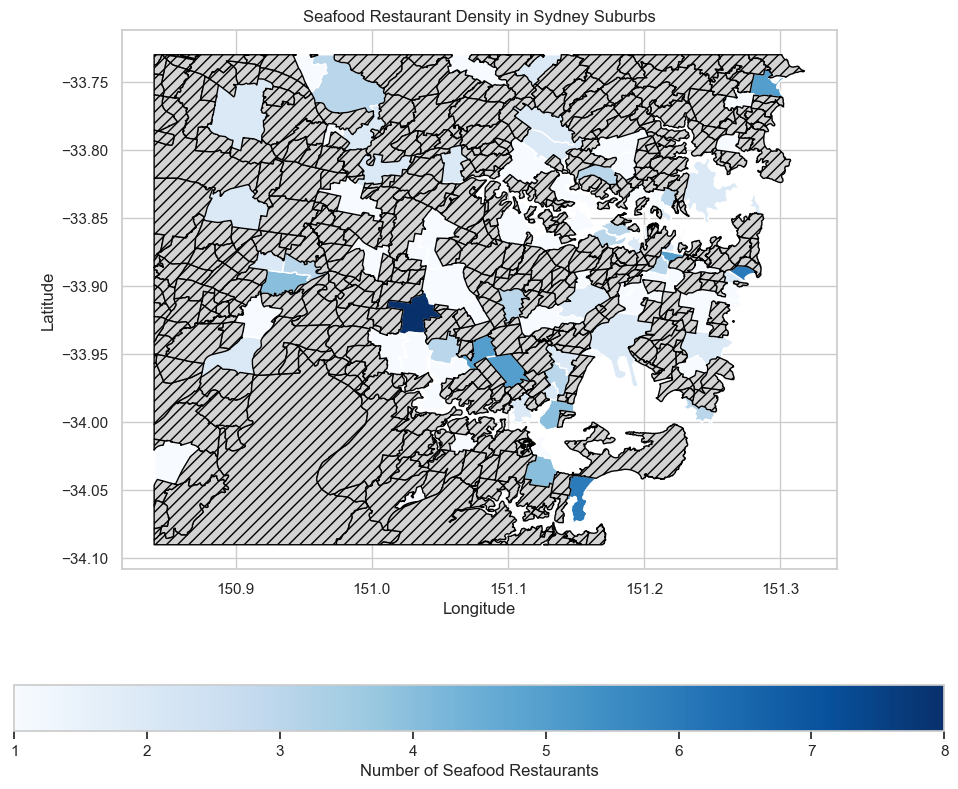

In [7]:
# Loading necessary Libraries
import geopandas as gpd


# Loading the dataset # Made changes to dataset previously, so loading again
df = pd.read_csv('zomato_df_final_data.csv')

# Filtering for Seafood 
seafood_restaurants = df[df['cuisine'].str.contains('Seafood', case=False)]

# Count of number of Seafood restaurants per suburb
seafood_counts = seafood_restaurants['subzone'].value_counts().reset_index()
seafood_counts.columns = ['subzone', 'seafood_count']

# Loading the GeoJSON file
sydney_map = gpd.read_file('sydney.geojson')

# Looking for the info
sydney_map.info()

# Merging the seafood counts with the map 
merged_data = sydney_map.set_index('SSC_NAME').join(seafood_counts.set_index('subzone'))

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_data.plot(column='seafood_count', ax=ax, legend=True,
                 legend_kwds={'label': "Number of Seafood Restaurants",
                              'orientation': "horizontal"},
                 cmap='Blues', missing_kwds={
                     'color': 'lightgrey',
                     'label': 'No Seafood Restaurants',
                     'hatch': '///',
                     'edgecolor': 'black'
                 })

plt.title('Seafood Restaurant Density in Sydney Suburbs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Cuisine Destiny Map: Asian 

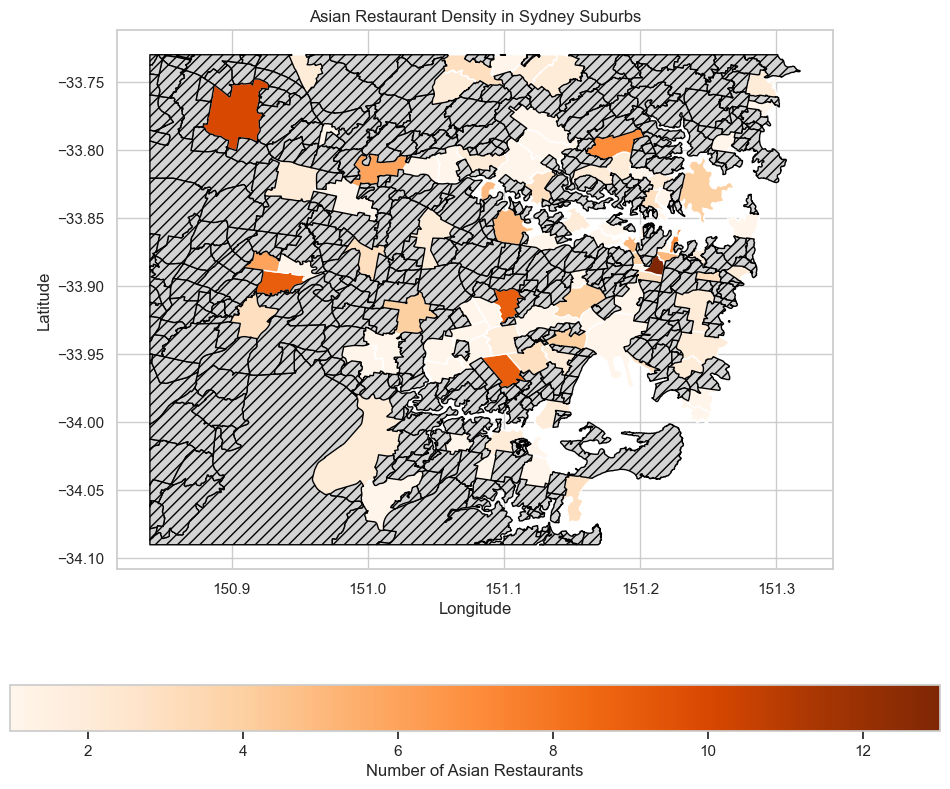

In [8]:
# Filtering for Asian cuisine
asian_restaurants = df[df['cuisine'].str.contains('Asian', case=False)]

# Count of number of Asian restaurants per suburb
asian_counts = asian_restaurants['subzone'].value_counts().reset_index()
asian_counts.columns = ['subzone', 'asian_count']

# Loading the GeoJSON file
sydney_map = gpd.read_file('sydney.geojson')

# Merging the Asian counts with the map
merged_data2 = sydney_map.set_index('SSC_NAME').join(asian_counts.set_index('subzone'))

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged_data2.plot(column='asian_count', ax=ax, legend=True,
                 legend_kwds={'label': "Number of Asian Restaurants",
                              'orientation': "horizontal"},
                 cmap='Oranges', missing_kwds={
                     'color': 'lightgrey',
                     'label': 'No Asian Restaurants',
                     'hatch': '///',
                     'edgecolor': 'black'
                 })

plt.title('Asian Restaurant Density in Sydney Suburbs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Looking at the the Histogram of Rating_Numbers

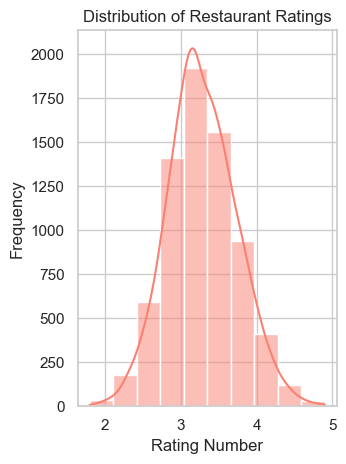

In [9]:
# Histogram for Rating Numbers
plt.subplot(1, 2, 2)
sns.histplot(df['rating_number'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating Number')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Interactive Histogram offer: view adjustment, detailed bars and zoom in or out option

In [10]:
# Loading Necessary Libraries
import plotly.express as px

# Creating an interactive histogram with Plotly
fig = px.histogram(df, 
                   x='rating_number', 
                   nbins=10,  
                   title="Distribution of Restaurant Ratings", 
                   labels={'rating_number': 'Rating Number'}, 
                   color_discrete_sequence=['salmon'],
                   marginal="box",  
                   hover_data=['title'])  

# Updating display layout
fig.update_layout(
    xaxis_title="Rating Number",
    yaxis_title="Frequency",
    bargap=0.2  
)

fig.show()




ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed